In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#read data 
df = pd.read_csv('winequality-red.csv')

In [3]:
#get info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#first 5 row from dataset
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<function matplotlib.pyplot.show(close=None, block=None)>

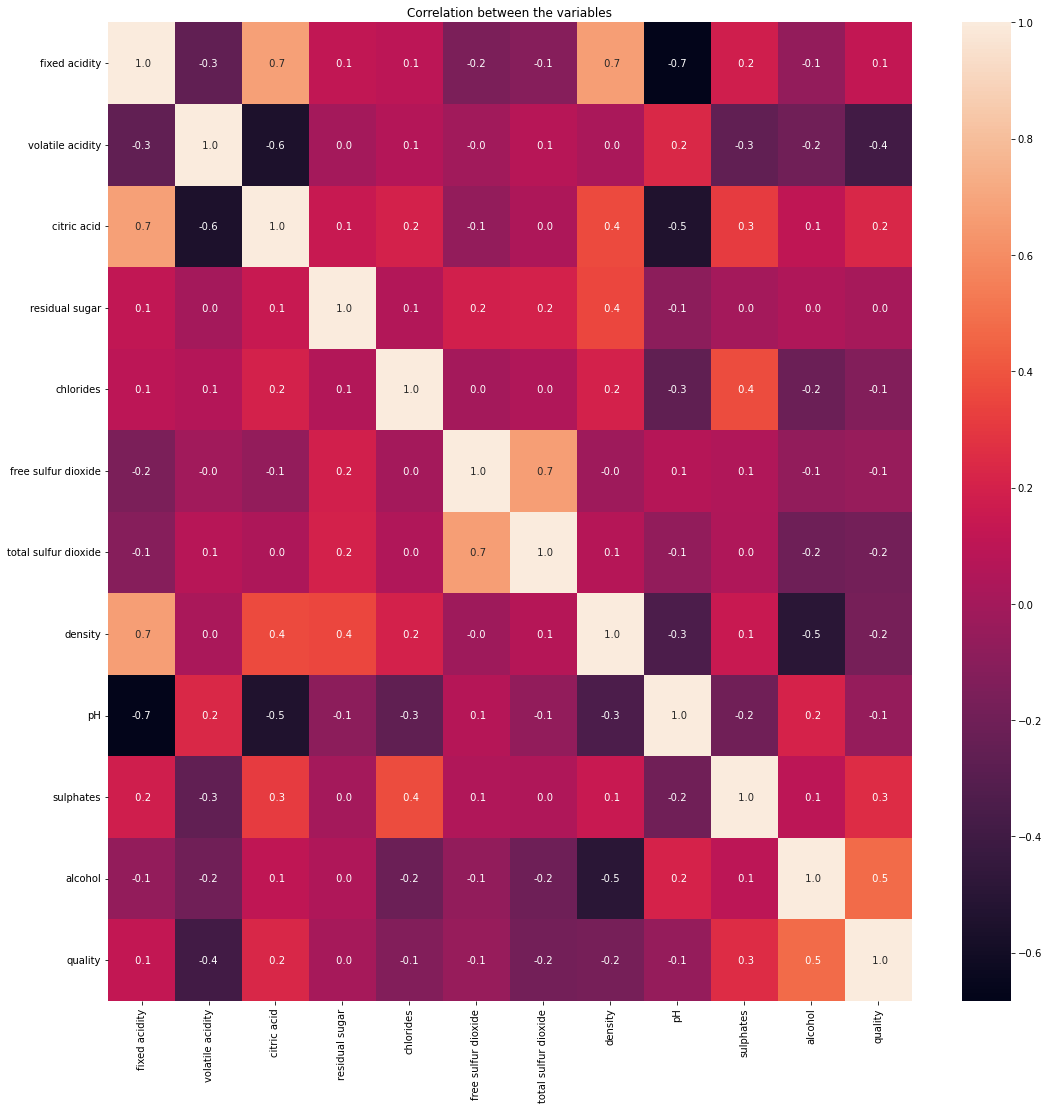

In [7]:
#correlation between the variables 
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, fmt= ' .1f')
plt.title('Correlation between the variables')
plt.show

from the correlation matrix we can see that alchohol is strongly correlated with quality. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


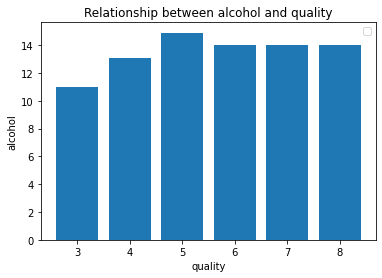

In [10]:
plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

Prepate data for classification

In [11]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler(feature_range=(0,1))
normal_df = sclr.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns=df.columns)
normal_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


“Good wine” equals “yes” when the quality is equal or above 7. “Good wine” equals “no” when the quality is less than 7. Classification models will finally output “yes” or “no” to predict wine quality.

In [12]:
df["good wine"] = ["yes" if i >=7 else "no" for i in df ['quality']]

In [13]:
X = normal_df.drop(['quality'], axis = 1)
Y = df["good wine"]

In [14]:
Y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


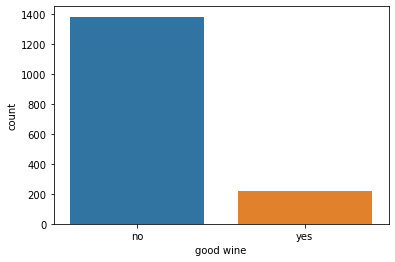

In [15]:
#visualize the count 
sns.countplot(Y)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify = Y)

In [34]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=42)

dummy_classifier.fit(X_train,y_train)

acc_baseline = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.865625


 Support Vector Classifier
fit the training data to an SVM model.

In [35]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train,y_train)

SVC(random_state=42)

In [37]:
#predict the outcomes for the test set and print its accuracy score.
from sklearn import metrics
from sklearn.metrics import accuracy_score
predic = svc.predict(X_test)
print("Accuracy SVM: ", metrics.accuracy_score(y_test, predic))

Accuracy SVM:  0.896875


Tune the Model’s Parameters

In [38]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svc_random = RandomizedSearchCV(svc,random_grid,cv=5,random_state=42)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

d:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 1000}


In [39]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
              'kernel':['linear', 'rbf','poly']}
svc_cv = GridSearchCV(svc, param_dist, cv=10)
svc_cv.fit(X_train,y_train)
print(svc_cv.best_params_)

{'C': 1.2, 'kernel': 'rbf'}


In [40]:
svc_new = SVC(C = 1.2, kernel = "rbf", random_state=42)
svc_new.fit(X_train, y_train)
y_pred_new = svc_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))

0.903125


By tuning the hyperparameters, the performance of the SVM model increase from 0.8969 to 0.903.